In [1]:
from IPython.display import display

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [3]:
from importlib import reload

import utils
reload(utils)
from utils import find_optimal_degree, draw_scatter_plot

import regression3
reload(regression3)
from regression3 import LinearRegression3

In [4]:
df = pd.read_csv("data.csv", names=["C1", "C2", "C3", "C4"])
display(df)
df.describe()

,C1,C2,C3,C4
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


,C1,C2,C3,C4
count,100.000000,100.000000,100.000000,100.000000
mean,2.000000,2.000000,1.960000,1.851276
std,1.172181,1.172154,1.163005,2.774643
min,0.000000,0.070303,0.027879,-5.332455
25%,1.000000,0.979394,0.952121,0.527533
50%,2.000000,2.009697,1.949091,2.879003
75%,3.000000,3.040000,2.946061,3.925389
max,4.000000,3.949091,3.943030,5.545892


In [5]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Задание 1

In [6]:
# X = df["C1"].values.reshape(-1, 1)
# Y = df["C4"].values
# print(len(X), len(Y))

# Задание 2

In [7]:
X = df[["C1", "C2", "C3"]].values
Y = df["C4"].values
print(len(X), len(Y))

100 100


In [8]:
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, Y, test_size=0.3, random_state=42)
print(len(X_train_70), len(X_test_30))

70 30


## a)

In [9]:
linear_model = LinearRegression()
linear_model.fit(X, Y)

LinearRegression()

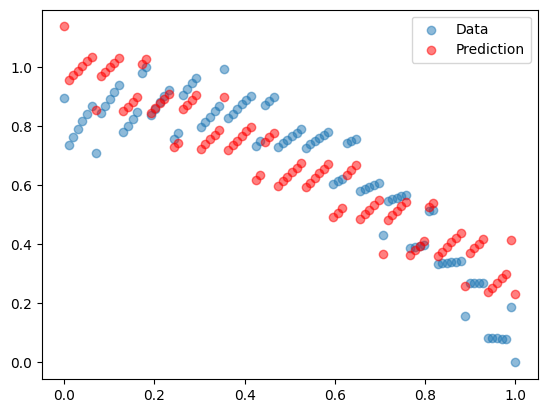

In [10]:
y_pred = linear_model.predict(X)
draw_scatter_plot(X, Y, y_pred)

In [11]:
x_values = X[:3]
print(x_values)
predictions = linear_model.predict(x_values)
print("Predictions for x = 1, 2, 3:", predictions)

[[0.         0.86875    0.10526316]
 [0.01010101 0.01666667 0.21981424]
 [0.02020202 0.19583333 0.33436533]]
Predictions for x = 1, 2, 3: [1.13636521 0.95617005 0.97179999]


## b)

In [12]:
mse_scores = cross_val_score(linear_model, X, Y, cv=10, scoring='neg_mean_squared_error')
average_mse = -mse_scores.mean()
print("Average MSE with cross-validation:", average_mse)
print("Average RMSE with cross-validation:", np.sqrt(average_mse))

Average MSE with cross-validation: 0.02320494777328371
Average RMSE with cross-validation: 0.152331703112923


## c)

Проведём эксперимент со всеми данными

Optimal degree with cross-validation: 2
Error: 3.208445212953584e-31


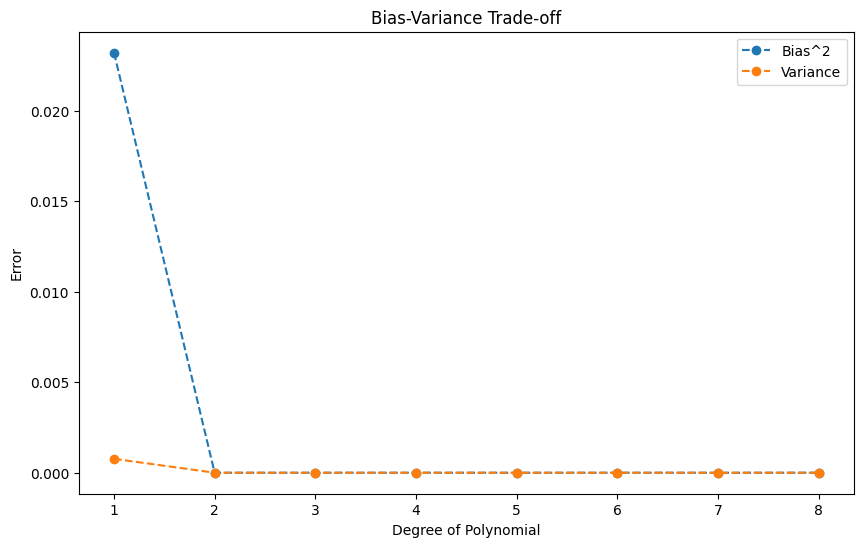

2

In [13]:
find_optimal_degree(x=X, y=Y, model=LinearRegression(), cv=10, max_degree=8)

## d)

Проведём эксперимент на 70% данных используя K-fold

Optimal degree with cross-validation: 2
Error: 3.5313851460284355e-31


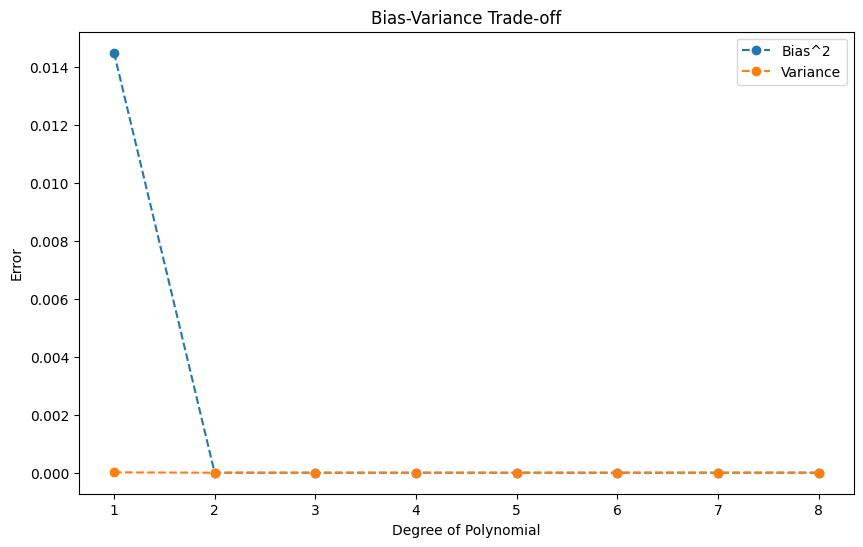

In [14]:
skf = KFold(n_splits=10, shuffle=True, random_state=42)
optimal_degree = find_optimal_degree(x=X_train_70, y=y_train_70, model=LinearRegression(), cv=skf, max_degree=8)

MSE 1.4832228478374232e-31


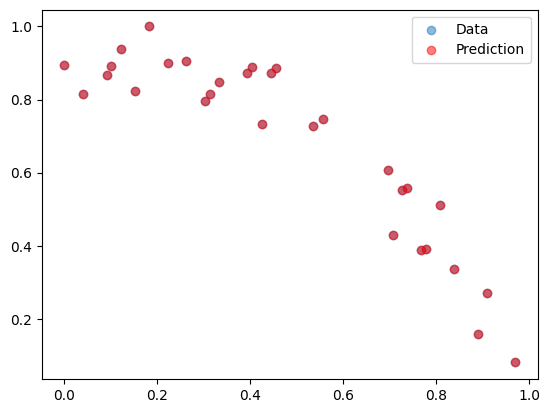

In [15]:
polynomial_features = PolynomialFeatures(degree=optimal_degree, include_bias=True)
X_poly_train_70 = polynomial_features.fit_transform(X_train_70)     
X_poly_test_30 = polynomial_features.transform(X_test_30)

model = LinearRegression()
model.fit(X_poly_train_70, y_train_70)

y_pred_30 = model.predict(X_poly_test_30)
mse = mean_squared_error(y_test_30, y_pred_30)
print("MSE", mse)

draw_scatter_plot(X_test_30, y_test_30, y_pred_30)

# Задание 3

## a)

In [16]:
linear_model3 = LinearRegression3()
linear_model3.fit(X, Y)

LinearRegression3()

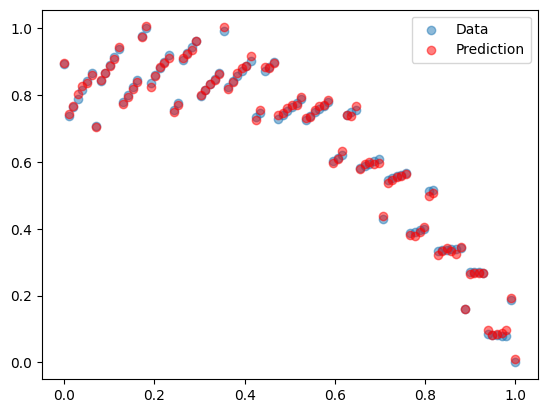

In [17]:
y_pred = linear_model3.predict(X)
draw_scatter_plot(X, Y, y_pred)

In [18]:
x_values = X[:3]
print(x_values)
predictions = linear_model3.predict(x_values)
print("Predictions for x = 1, 2, 3:", predictions)

[[0.         0.86875    0.10526316]
 [0.01010101 0.01666667 0.21981424]
 [0.02020202 0.19583333 0.33436533]]
Predictions for x = 1, 2, 3: [0.89714259 0.74422476 0.76659049]


## b)

In [19]:
mse_scores = cross_val_score(linear_model3, X, Y, cv=2, scoring='neg_mean_squared_error')
average_mse = -mse_scores.mean()
print("Average MSE with cross-validation:", average_mse)
print("Average RMSE with cross-validation:", np.sqrt(average_mse))

Average MSE with cross-validation: 0.052611873514330706
Average RMSE with cross-validation: 0.22937278285431056


## C)

Проведём эксперимент со всеми данными

Optimal degree with cross-validation: 1
Error: 0.00020182072284809433


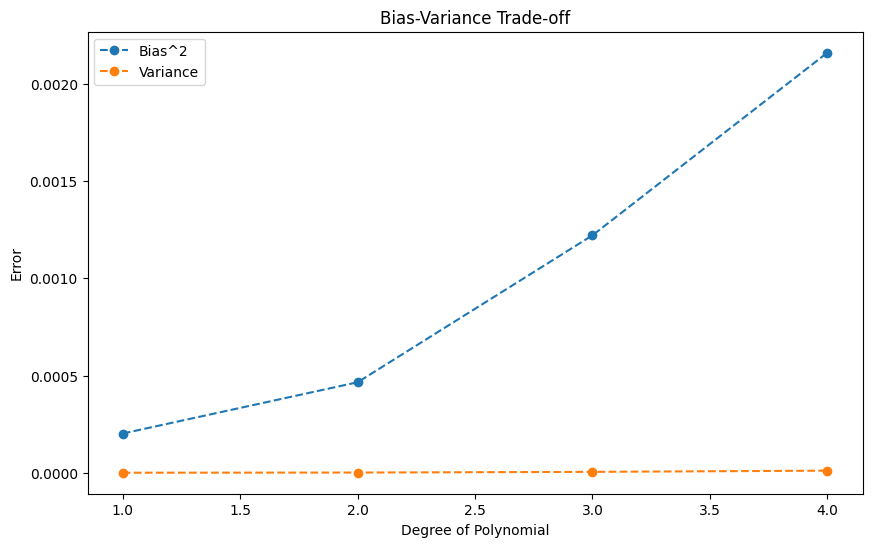

1

In [20]:
find_optimal_degree(x=X, y=Y, model=LinearRegression3(), cv=10, max_degree=4)

## d)

Optimal degree with cross-validation: 1
Error: 1.2685747799066291e-05


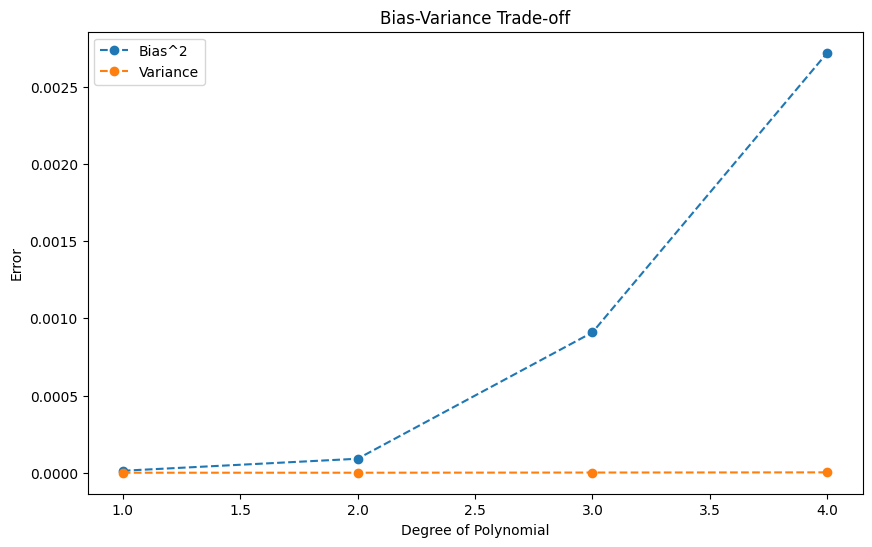

In [21]:
skf = KFold(n_splits=10, shuffle=True, random_state=42)
optimal_degree = find_optimal_degree(x=X_train_70, y=y_train_70, model=LinearRegression3(), cv=skf, max_degree=4)

MSE 6.088670293407204e-06


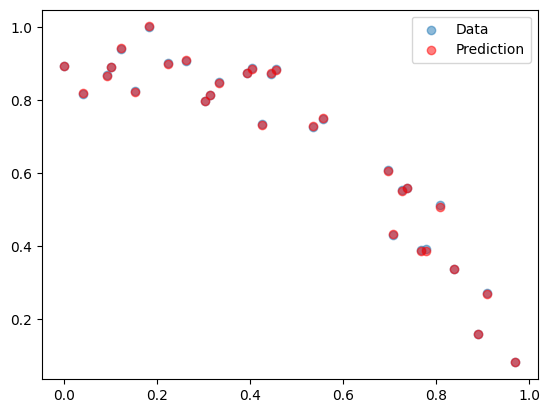

In [22]:
polynomial_features = PolynomialFeatures(degree=optimal_degree, include_bias=True)
X_poly_train_70 = polynomial_features.fit_transform(X_train_70)     
X_poly_test_30 = polynomial_features.transform(X_test_30)

model = LinearRegression3()
model.fit(X_poly_train_70, y_train_70)

y_pred_30 = model.predict(X_poly_test_30)
mse = mean_squared_error(y_test_30, y_pred_30)
print("MSE", mse)

draw_scatter_plot(X_test_30, y_test_30, y_pred_30)